In [ ]:
# Import necessary modules
from google.colab import files
import io
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

import seaborn as sns
import nltk
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt




---



# Part 1

## A.

In [ ]:
# Uploading the training dataset
uploaded = files.upload()

Saving covid-tweets-train.csv to covid-tweets-train (2).csv


In [ ]:
# Creating the training dataframe
data = pd.read_csv(io.BytesIO(uploaded['covid-tweets-train.csv']), sep = ',')

In [ ]:
# Uploading the testing dataset
uploaded = files.upload()

Saving covid-tweets-test.csv to covid-tweets-test (2).csv


In [ ]:
# Creating the testing dataframe
data_test = pd.read_csv(io.BytesIO(uploaded['covid-tweets-test.csv']), sep = ',')

In [ ]:
# Number of observations in class 0
select_0 = data['Sentiment'] == '0'
data_0 = data[select_0]
print(data_0.shape)

(15397, 3)


In [ ]:
# Number of observations in class 1
select_1 = data['Sentiment'] == '1'
data_1 = data[select_1]
print(data_1.shape)

(7712, 3)


In [ ]:
# Number of observations in class 2
select_2 = data['Sentiment'] == '2'
data_2 = data[select_2]
print(data_2.shape)

(18042, 3)


Proportion of observations in each class:

The proportion of observations in class 0 is 0.374.

The proportion of observations in class 1 is 0.187.

The proportion of observations in class 2 is 0.438.


---



## B.

In [ ]:
#### Tokenizing tweets ####

# Download the tokenizer
nltk.download('punkt')

def tokenize_tweets(data):
  # Create a new column in our DF that contains token lists instead of raw text
  data['tokens'] = data['OriginalTweet'].apply(nltk.word_tokenize)

  print(data['tokens'].head(5))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Tokenizing the training data tweets
tokenize_tweets(data)
# Tokenizing the testing data tweets
tokenize_tweets(data_test)

0    [@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http...
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia, :, Woolworths, to, gi...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me, ,, ready, to, go, at, supermarket, during...
Name: tokens, dtype: object
0    [TRENDING, :, New, Yorkers, encounter, empty, ...
1    [When, I, could, n't, find, hand, sanitizer, a...
2    [Find, out, how, you, can, protect, yourself, ...
3    [#, Panic, buying, hits, #, NewYork, City, as,...
4    [#, toiletpaper, #, dunnypaper, #, coronavirus...
Name: tokens, dtype: object




---



## C.

In [ ]:
#### Removing URL tokens from the observations ####

def remove_url(data):
  tokens_no_punct = []
  # Create a list of lists with what we want
  for row in data['tokens']:
    tokens_no_punct.append([re.sub(r"http\S+", '', t) for t in row])
  # add the new info to our df
  data['tokens_no_punct'] = tokens_no_punct

  print(data['tokens_no_punct'].head(5))

In [ ]:
# Removing URL tokens from training data
remove_url(data)
# Removing URL tokens from testing data
remove_url(data_test)

0    [@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, , :,...
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia, :, Woolworths, to, gi...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me, ,, ready, to, go, at, supermarket, during...
Name: tokens_no_punct, dtype: object
0    [TRENDING, :, New, Yorkers, encounter, empty, ...
1    [When, I, could, n't, find, hand, sanitizer, a...
2    [Find, out, how, you, can, protect, yourself, ...
3    [#, Panic, buying, hits, #, NewYork, City, as,...
4    [#, toiletpaper, #, dunnypaper, #, coronavirus...
Name: tokens_no_punct, dtype: object




---



## D.

In [ ]:
##### Convert tokens into lowercase ####

def token_lower(data):
  lowercase_tokens = []
  # Create a list of lists with what we want
  for row in data['tokens_no_punct']:
    lowercase_tokens.append([t.lower() for t in row])
  # add the new info to our df
  data['lowercase_tokens'] = lowercase_tokens

  print(data['lowercase_tokens'].head(5))

In [ ]:
# Converting training data tokens into lowercase
token_lower(data)
# Converting testing data tokens into lowercase
token_lower(data_test)

0    [@, menyrbie, @, phil_gahan, @, chrisitv, , :,...
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, :, woolworths, to, gi...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, ,, ready, to, go, at, supermarket, during...
Name: lowercase_tokens, dtype: object
0    [trending, :, new, yorkers, encounter, empty, ...
1    [when, i, could, n't, find, hand, sanitizer, a...
2    [find, out, how, you, can, protect, yourself, ...
3    [#, panic, buying, hits, #, newyork, city, as,...
4    [#, toiletpaper, #, dunnypaper, #, coronavirus...
Name: lowercase_tokens, dtype: object


In [ ]:
##### Removing punctuation and special characters #####

def remove_punct(data):
  list(data)
  tokens_no_punct = []
  # Create a list of lists with what we want
  for row in data['lowercase_tokens']:
    tokens_no_punct.append([re.sub('[^\w\s]','', t) for t in row])
  # add the new info to our df
  data['tokens_no_punct'] = tokens_no_punct

  print(data['tokens_no_punct'].head(5))

In [ ]:
# Removing punctuation and special characters for training data
remove_punct(data)
# Removing punctuation and special characters for testing data
remove_punct(data_test)

0    [, menyrbie, , phil_gahan, , chrisitv, , , tco...
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, , woolworths, to, giv...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, , ready, to, go, at, supermarket, during,...
Name: tokens_no_punct, dtype: object
0    [trending, , new, yorkers, encounter, empty, s...
1    [when, i, could, nt, find, hand, sanitizer, at...
2    [find, out, how, you, can, protect, yourself, ...
3    [, panic, buying, hits, , newyork, city, as, a...
4    [, toiletpaper, , dunnypaper, , coronavirus, ,...
Name: tokens_no_punct, dtype: object


A scenario where it would be useful to keep special characters would be in the case of usernames in Twitter. It would be useful to keep the '@' symbol in the case of Twitter handles. The usernames could then be removed from the data since they do not usually add anything to the sentiment analysis of the tweet.



---



## E.

In [ ]:
# Copying data for the purpose of lemmatization without redoing preprocessing
# later on
data_lem = data.copy()
data_test_lem = data_test.copy()

In [ ]:
#### Stemming words ####

# Using PorterStemmer
from nltk.stem.porter import *

def stemming(data):
  stemmer = PorterStemmer()
  # Create a list of lists with what we want
  stemmed_tokens = []
  for row in data['tokens_no_punct']:
    stemmed_tokens.append([stemmer.stem(t) for t in row])
  # add the new info to our df
  data['stemmed_tokens'] = stemmed_tokens

  # Print results
  print('Before stemming:\n', data['tokens_no_punct'].head(3))
  print('After stemming:\n', data['stemmed_tokens'].head(3))

# Stemming training data words
stemming(data)
# Stemming testing data words
stemming(data_test)

Before stemming:
 0    [, menyrbie, , phil_gahan, , chrisitv, , , tco...
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, , woolworths, to, giv...
Name: tokens_no_punct, dtype: object
After stemming:
 0    [, menyrbi, , phil_gahan, , chrisitv, , , tcoi...
1    [advic, talk, to, your, neighbour, famili, to,...
2    [coronaviru, australia, , woolworth, to, give,...
Name: stemmed_tokens, dtype: object
Before stemming:
 0    [trending, , new, yorkers, encounter, empty, s...
1    [when, i, could, nt, find, hand, sanitizer, at...
2    [find, out, how, you, can, protect, yourself, ...
Name: tokens_no_punct, dtype: object
After stemming:
 0    [trend, , new, yorker, encount, empti, superma...
1    [when, i, could, nt, find, hand, sanit, at, fr...
2    [find, out, how, you, can, protect, yourself, ...
Name: stemmed_tokens, dtype: object




---



## F.

In [ ]:
#### Removing stopwords ####

def stopwords(data):

  # Importing and downloading stopwords
  from nltk.corpus import stopwords
  nltk.download('stopwords')

  # Choosing to remove only the first 100 stopwords
  sw = stopwords.words('english')[:100]

  # Create a list of lists with what we want
  tokens_no_sw = []
  for row in data['stemmed_tokens']:
    tokens_no_sw.append([w for w in row if w not in sw])
  # Add column to df
  data['tokens_no_sw'] = tokens_no_sw

  # Print some examples
  print(data['tokens_no_sw'].tail(5))

# Removing stopwords from training stemmed tokens
stopwords(data)
# Removing stopwords from testing stemmed tokens
stopwords(data_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


41150    [airlin, pilot, offer, stock, supermarket, she...
41151    [respons, complaint, not, provid, cite, covid1...
41152    [know, itâ, get, tough, when, , kameronwild, r...
41153    [wrong, smell, hand, sanit, start, turn, , , c...
41154    [, tartiicat, well, newus, rift, s, go, , 7000...
Name: tokens_no_sw, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3793    [meanwhil, supermarket, israel, , peopl, danc,...
3794    [panic, buy, lot, nonperish, item, , echo, nee...
3795    [asst, prof, econom, , cconc, wa, , nbcphilade...
3796    [gov, need, someth, instead, biar, je, rakyat,...
3797    [, forestandpap, member, commit, safeti, emplo...
Name: tokens_no_sw, dtype: object




---



## G.

In [ ]:
#### Dropping intermediate columns ####

def column_drop(data):
  list(data)
  data.drop(['tokens','lowercase_tokens', 'tokens_no_punct','stemmed_tokens'], axis = 1, inplace=True)

  print('After removal:\n', list(data))

  # Remove blank tokens
  no_blanks = []
  for row in data['tokens_no_sw']:
    no_blanks.append([t for t in row if t != ''])
  data['tokens'] = no_blanks

  print(data['tokens'].head(5))

  # drop the last intermediate column
  data.drop(['tokens_no_sw'], axis = 1, inplace=True)

  # Now we should have only the label, original text, and cleaned token lists
  print('Current Columns:\n',list(data))

# Dropping intermediate columns for training data (Stemmed)
column_drop(data)
# Dropping intermediate columns for testing data (Stemmed)
column_drop(data_test)

After removal:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens_no_sw']
0    [menyrbi, phil_gahan, chrisitv, tcoifz9fan2pa,...
1    [advic, talk, neighbour, famili, exchang, phon...
2    [coronaviru, australia, woolworth, give, elder...
3    [food, stock, not, onli, one, empti, pleas, nt...
4    [readi, go, supermarket, dure, covid19, outbre...
Name: tokens, dtype: object
Current Columns:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens']
After removal:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens_no_sw']
0    [trend, new, yorker, encount, empti, supermark...
1    [when, could, nt, find, hand, sanit, fred, mey...
2     [find, how, can, protect, love, one, coronaviru]
3    [panic, buy, hit, newyork, citi, anxiou, shopp...
4    [toiletpap, dunnypap, coronaviru, coronavirusa...
Name: tokens, dtype: object
Current Columns:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens']


In [ ]:
# Dropping NA values
data.dropna(inplace=True)
data_test.dropna(inplace=True)

In [ ]:
#### Vectorizing training data (Stemmed) ####

def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Separate labels from features, converting to numpy arrays
X, y = data['tokens'].to_numpy(), data['Sentiment'].to_numpy()

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

counts = count_vec.fit_transform(X)
print(counts.toarray().shape)

X = counts.toarray()

(41153, 1000)


Choosing to consider a maximum of 1000 features (due to RAM crashing issues on Colab), the length of the vocabulary is 41153000.

In [ ]:
#### Vectorizing testing data (Stemmed) ####

# Separate labels from features, converting to numpy arrays
X_test, y_test = data_test['tokens'].to_numpy(), data_test['Sentiment'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

counts_test = count_vec.fit_transform(X_test)
print(counts_test.toarray().shape)

X_test = counts_test.toarray()

(3798, 1000)


Choosing to consider a maximum of 1000 features (due to RAM crashing issues on Colab), the length of the vocabulary is 3798000.



---



### H.

In [ ]:
# Let's fit the Naive Bayes model to our training data

# Laplace smoothing is done by default
nb = MultinomialNB()
# Fit model to training data
nb.fit(X, y)
# Predict on train data
y_preds = nb.predict(X)

print('Train accuracy with simple Naive Bayes:',accuracy_score(y,y_preds))

Train accuracy with simple Naive Bayes: 0.6817485967001191


In [ ]:
# Let's fit the Naive Bayes model to our testing data

# Laplace smoothing is doen by default
nb = MultinomialNB()
# Fit model to training data
nb.fit(X, y)
# Predict on test data
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test.astype(str),y_preds.astype(str)))

Test accuracy with simple Naive Bayes: 0.2904160084254871


The training accuracy is approximately 68% and the testing accuracy is approximately 29%.



---



### I.

It would not be appropriate to fit an ROC curve in this scenario since it is a graphical plot that illustrates the diagnostic ability of a **binary classifier system** as its discrimination threshold is varied (https://www.researchgate.net/post/What-situation-we-have-to-use-ROC-curve-analysis). This implies that it would work best to check binary classifier models, but in our case **we have three classes**.

If we wanted to plot ROC curves in this scenario, we would need to plot one for every class, with the binary signal being whether or not the tweet belongs to that class.



---



### J.

In [ ]:
#### TF-IDF Vectorize for training data ####

# Smoothing is done by default
tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts)

print(tfs.toarray())

# Using TFIDF counts for modelling
X = tfs.toarray()

# First three rows of training features and labels
print('First 3 features:\n',X[:3])
print('First 3 labels:\n',y[:3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 labels:
 ['1' '2' '2']


In [ ]:
#### TF-IDF Vectorize for testing data ####

# Smoothing is done by default
tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts_test)

print(tfs.toarray())

# Using the TFIDF counts for modelling
X_test = tfs.toarray()

# First three rows of training features and labels
print('First 3 features:\n',X_test[:3])
print('First 3 labels:\n',y_test[:3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 labels:
 [0 2 2]


In [ ]:
#### Naive Bayes model for training data using TF-IDF Vectorization ####

# Fitting the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X, y)
# Predict on train data
y_preds = nb.predict(X)

print('Train accuracy with simple Naive Bayes:',accuracy_score(y,y_preds))

Train accuracy with simple Naive Bayes: 0.6646174033484801


In [ ]:
#### Naive Bayes model for testing data using TF-IDF Vectorization ####

# Fitting the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X, y)
# Predict on test data
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test.astype(str),y_preds.astype(str)))

Test accuracy with simple Naive Bayes: 0.4204844655081622


The training accuracy is approximately 66% and the testing accuracy is approximately 42%.

The training accuracy with TF-IDF vectorization is similar to that with Count Vectorization, except Count Vectorization may perform slightly better (68% comapred to 66%).

The testing accuracy, however, is marginally better (13%) with TF-IDF vectorization (42%), as compared to Count Vectorization (29%).



---



### K.

In [ ]:
#### Lemmatizing Words ####

def lemming(data_lem):
  nltk.download('omw-1.4')
  from nltk.stem import WordNetLemmatizer
  nltk.download('wordnet')

  lemmatizer = WordNetLemmatizer()

  lem_tokens = []
  for row in data_lem['tokens_no_punct']:
    lem_tokens.append([lemmatizer.lemmatize(t) for t in row])

  data_lem['lem_tokens'] = lem_tokens

  # Print results
  print(data_lem['lem_tokens'].head(5))

In [ ]:
# Lemmatizing training data Words
lemming(data_lem)
# Lemmatizing testing data Words
lemming(data_test_lem)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [, menyrbie, , phil_gahan, , chrisitv, , , tco...
1    [advice, talk, to, your, neighbour, family, to...
2    [coronavirus, australia, , woolworth, to, give...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, , ready, to, go, at, supermarket, during,...
Name: lem_tokens, dtype: object


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [trending, , new, yorkers, encounter, empty, s...
1    [when, i, could, nt, find, hand, sanitizer, at...
2    [find, out, how, you, can, protect, yourself, ...
3    [, panic, buying, hit, , newyork, city, a, anx...
4    [, toiletpaper, , dunnypaper, , coronavirus, ,...
Name: lem_tokens, dtype: object


In [ ]:
#### Removing stopwords from lemmatized tokens ####

def lem_stopwords(data_lem):
  from nltk.corpus import stopwords
  nltk.download('stopwords')

  sw = stopwords.words('english')[:100]

  tokens_no_sw = []
  for row in data_lem['lem_tokens']:
    tokens_no_sw.append([w for w in row if w not in sw])
  # Add column to df
  data_lem['tokens_no_sw'] = tokens_no_sw

  # Print some examples
  print(data_lem['tokens_no_sw'].tail(5))

In [ ]:
# Removing stopwords from training lemmatized tokens
lem_stopwords(data_lem)
# Removing stopwords from testing lemmatized tokens
lem_stopwords(data_test_lem)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


41150    [airline, pilot, offering, stock, supermarket,...
41151    [response, complaint, not, provided, citing, c...
41152    [know, itâs, getting, tough, when, , kameronwi...
41153    [wrong, smell, hand, sanitizer, starting, turn...
41154    [, tartiicat, well, newused, rift, s, going, ,...
Name: tokens_no_sw, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3793    [meanwhile, supermarket, israel, , people, dan...
3794    [panic, buy, lot, nonperishable, item, , echo,...
3795    [asst, prof, economics, , cconces, wa, , nbcph...
3796    [gov, need, somethings, instead, biar, je, rak...
3797    [, forestandpaper, member, committed, safety, ...
Name: tokens_no_sw, dtype: object


In [ ]:
#### Dropping intermediate columns (Lemmatization) ####

def lem_drop(data_lem):
  list(data_lem)
  data_lem = data_lem.drop(['tokens','lowercase_tokens', 'tokens_no_punct','lem_tokens'], axis = 1)

  print('After removal:\n', list(data_lem))

  # Remove blank tokens
  no_blanks = []
  for row in data_lem['tokens_no_sw']:
    no_blanks.append([t for t in row if t != ''])
  data_lem['tokens'] = no_blanks

  print(data_lem['tokens'].head(5))

  # drop the last intermediate column
  data_lem = data_lem.drop(['tokens_no_sw'], axis = 1)

  # Now we should have only the label, original text, and cleaned token lists
  print('Current Columns:\n',list(data_lem))

In [ ]:
# Dropping intermediate columns in the training dataset
lem_drop(data_lem)
# Dropping intermediate columns in the testing dataset
lem_drop(data_test_lem)

After removal:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens_no_sw']
0    [menyrbie, phil_gahan, chrisitv, tcoifz9fan2pa...
1    [advice, talk, neighbour, family, exchange, ph...
2    [coronavirus, australia, woolworth, give, elde...
3    [food, stock, not, only, one, empty, please, n...
4    [ready, go, supermarket, covid19, outbreak, no...
Name: tokens, dtype: object
Current Columns:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens']
After removal:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens_no_sw']
0    [trending, new, yorkers, encounter, empty, sup...
1    [when, could, nt, find, hand, sanitizer, fred,...
2    [find, how, can, protect, loved, one, coronavi...
3    [panic, buying, hit, newyork, city, anxious, s...
4    [toiletpaper, dunnypaper, coronavirus, coronav...
Name: tokens, dtype: object
Current Columns:
 ['Unnamed: 0', 'OriginalTweet', 'Sentiment', 'tokens']


In [ ]:
# Dropping NA values
data_lem = data_lem.dropna()
data_test_lem = data_test_lem.dropna()

In [ ]:
#### Vectorizing training data (Lemmatized) ####

# Separate labels from features, converting to numpy arrays
X, y = data_lem['tokens'].to_numpy(), data_lem['Sentiment'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

counts = count_vec.fit_transform(X)
print(counts.toarray().shape)

X = counts.toarray()

(41153, 1000)


In [ ]:
#### TF-IDF Vectorize for training data ####

# Smoothing is done by default
tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts)

print(tfs.toarray())

# Using the TFIDF counts for modelling
X = tfs.toarray()

# First three rows of training features and labels
print('First 3 features:\n',X[:3])
print('First 3 labels:\n',y[:3])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.35997769 0.17435234 0.         ... 0.         0.         0.        ]
 [0.         0.31009039 0.         ... 0.         0.         0.        ]
 [0.         0.         0.34589378 ... 0.         0.         0.        ]]
First 3 features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 3 labels:
 ['1' '2' '2']


In [ ]:
#### Vectorizing testing data (Lemmatized) ####

# Separate labels from features, converting to numpy arrays
X_test, y_test = data_test_lem['tokens'].to_numpy(), data_test_lem['Sentiment'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

counts_test = count_vec.fit_transform(X_test)
print(counts_test.toarray().shape)

X_test = counts_test.toarray()

(3798, 1000)


In [ ]:
#### TF-IDF Vectorize for testing data ####

# Smoothing is done by default
tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts_test)

print(tfs.toarray())

# Using the TFIDF counts for modelling
X_test = tfs.toarray()

# First three rows of training features and labels
print('First 3 features:\n',X_test[:3])
print('First 3 labels:\n',y_test[:3])

[[0.         0.06927186 0.         ... 0.         0.         0.        ]
 [0.26265748 0.11441475 0.20837977 ... 0.         0.         0.        ]
 [0.         0.09332267 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07452294 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
First 3 features:
 [[0.         0.06927186 0.         ... 0.         0.         0.        ]
 [0.26265748 0.11441475 0.20837977 ... 0.         0.         0.        ]
 [0.         0.09332267 0.         ... 0.         0.         0.        ]]
First 3 labels:
 [0 2 2]


In [ ]:
#### Naive Bayes model for training data using TF-IDF Vectorization ####

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X, y)
# Predict on test data
y_preds = nb.predict(X)

print('Train accuracy with simple Naive Bayes:',accuracy_score(y,y_preds))

Train accuracy with simple Naive Bayes: 0.6313998979418268


In [ ]:
# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X, y)
# Predict on test data
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test.astype(str),y_preds.astype(str)))

Test accuracy with simple Naive Bayes: 0.4426013691416535


The training accuracy is approximately 63% and the testing accuracy is approximately 44%.

The training accuracy with lemmatization is similar to that with stemming, except stemming may perform slightly better (66% compared to 63%). The testing accuracy, however, is slightly better (2%) with lemmatization (44%), as compared to stemming (42%).




---



#Part 2

In [ ]:
# Twitter API Credentials
# Used to extract tweets (DO NOT RUN)
api_key = 'ZJq0AKIQG2KJXVYnNPhbLHNqh'

api_secret_key = 'IpVlhy5rsDlu1nfBQACBhWRHPiJwPdz9JxpW7gzzLLuT5dSYv8'

access_key =  '3647359813-5QVl0YgeCJFMz1XxyWR8gQLEo0xXirgszRIdUeG'

access_secret = 'cvM355h2HmqoRoSqkKRgJ1RcmAczT66tiuzSMbp18x7Yg'

In [ ]:
# Used to extract tweets (DO NOT RUN)
import tweepy as tw

# Use credentials to authorize access
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Used to extract tweets (DO NOT RUN)
search_words = 'pink sauce'
date_since = "2022-07-17"

search_with_filter = search_words + " -filter:retweets"

tweets = tw.Cursor(api.search,
                       q=search_with_filter,
                       lang="en",
                       since=date_since,
                       result_type = 'recent').items(1000)
# a = []
# for tweet in tweets:
#   tweet.text = re.sub('@[\w]+','',tweet.text)
#   a.append(tweet.text)
a = [tweet.text for tweet in tweets]
# print(a)

In [ ]:
# Used to create dataframe from tweets (DO NOT RUN)
import pandas as pd
tweet_text = pd.DataFrame(a, columns = ['tweet'])

print(tweet_text.shape)

(1000, 1)


In [ ]:
# Used to label tweets (DO NOT RUN)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
data = tweet_text.dropna()
print(data.head())
print(data.shape)

                                               tweet
0  It’s pink, it’s popular, and potentially illeg...
1  I keep hearing of this pink sauce that this la...
2          the og pink sauce https://t.co/pkyWHF8Fyk
3  I blame the youth.\nWhere do you think the bur...
4  A condiment so bizarre it has terms and condit...
(1000, 1)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Used to label tweets (DO NOT RUN)
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["tweet"]]
data.head()

,tweet,Positive,Negative,Neutral,Compound
0,"It’s pink, it’s popular, and potentially illeg...",0.082,0.099,0.819,-0.1027
1,I keep hearing of this pink sauce that this la...,0.000,0.000,1.000,0.0000
2,the og pink sauce https://t.co/pkyWHF8Fyk,0.000,0.000,1.000,0.0000
3,I blame the youth.\nWhere do you think the bur...,0.000,0.138,0.862,-0.3400
4,A condiment so bizarre it has terms and condit...,0.000,0.178,0.822,-0.3804


In [ ]:
# Used to label tweets (DO NOT RUN)
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append(2)
    elif i <= -0.05 :
        sentiment.append(0)
    else:
        sentiment.append(1)
data["Sentiment"] = sentiment
data.head()

,tweet,Positive,Negative,Neutral,Compound,Sentiment
0,"It’s pink, it’s popular, and potentially illeg...",0.082,0.099,0.819,-0.1027,0
1,I keep hearing of this pink sauce that this la...,0.000,0.000,1.000,0.0000,1
2,the og pink sauce https://t.co/pkyWHF8Fyk,0.000,0.000,1.000,0.0000,1
3,I blame the youth.\nWhere do you think the bur...,0.000,0.138,0.862,-0.3400,0
4,A condiment so bizarre it has terms and condit...,0.000,0.178,0.822,-0.3804,0


In [ ]:
# Used to label tweets (DO NOT RUN)
data = data.drop(['Positive', 'Negative', 'Neutral', 'Compound'], axis = 1)
data.rename(columns = {'tweet':'OriginalTweet'}, inplace = True)
data.head()

,OriginalTweet,Sentiment
0,"It’s pink, it’s popular, and potentially illeg...",0
1,I keep hearing of this pink sauce that this la...,1
2,the og pink sauce https://t.co/pkyWHF8Fyk,1
3,I blame the youth.\nWhere do you think the bur...,0
4,A condiment so bizarre it has terms and condit...,0


In [ ]:
# Used to download the tweet data (DO NOT RUN)
from google.colab import drive
drive.mount("drive", force_remount=True)

data.to_csv('/content/drive/My Drive/tweets-data-final.csv', encoding='utf-8')

Mounted at drive


In [ ]:
# Uploading the training dataset (Upload the tweets-data-final.csv here)
uploaded = files.upload()

In [ ]:
# Creating the dataframe
data = pd.read_csv(io.BytesIO(uploaded['tweets-data-final.csv']), sep = ',')

In [ ]:
# Proportion of each class
print(data["Sentiment"].value_counts())

1    483
2    260
0    257
Name: Sentiment, dtype: int64


The proportion of Negative values are 25.7%, Neutral values are 48.3%, and
Positive values are 26%.

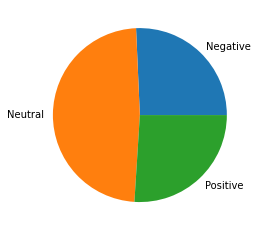

In [ ]:
# Visualizing the balance between the classes in the form of a pie chart
counts_0 = len(data[data['Sentiment'] == 0])
counts_1 = len(data[data['Sentiment'] == 1])
counts_2 = len(data[data['Sentiment'] == 2])
y = np.array([counts_0, counts_1, counts_2])
mylabels = ["Negative", "Neutral", "Positive"]

plt.pie(y, labels = mylabels)
plt.show()

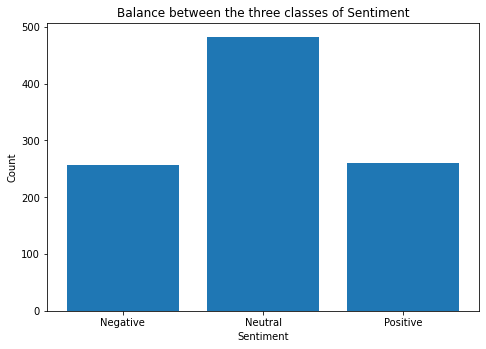

In [ ]:
# Visualizing the balance between the classes in the form of a bar graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = np.array([counts_0, counts_1, counts_2])
mylabels = ["Negative", "Neutral", "Positive"]
ax.bar(mylabels,y)
ax.set_ylabel('Count')
ax.set_xlabel('Sentiment')
ax.set_title('Balance between the three classes of Sentiment')
plt.show()

In [ ]:
# Basic Summary statistics of the data
data.describe()

,Sentiment
count,1000.000000
mean,1.003000
std,0.719381
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
# Tokenizing the data
tokenize_tweets(data)

0    [It, ’, s, pink, ,, it, ’, s, popular, ,, and,...
1    [I, keep, hearing, of, this, pink, sauce, that...
2    [the, og, pink, sauce, https, :, //t.co/pkyWHF...
3    [I, blame, the, youth, ., Where, do, you, thin...
4    [A, condiment, so, bizarre, it, has, terms, an...
Name: tokens, dtype: object


In [ ]:
# Removing URL tokens
remove_url(data)

0    [It, ’, s, pink, ,, it, ’, s, popular, ,, and,...
1    [I, keep, hearing, of, this, pink, sauce, that...
2       [the, og, pink, sauce, , :, //t.co/pkyWHF8Fyk]
3    [I, blame, the, youth, ., Where, do, you, thin...
4    [A, condiment, so, bizarre, it, has, terms, an...
Name: tokens_no_punct, dtype: object


In [ ]:
# Making the tokens lowercase
token_lower(data)

0    [it, ’, s, pink, ,, it, ’, s, popular, ,, and,...
1    [i, keep, hearing, of, this, pink, sauce, that...
2       [the, og, pink, sauce, , :, //t.co/pkywhf8fyk]
3    [i, blame, the, youth, ., where, do, you, thin...
4    [a, condiment, so, bizarre, it, has, terms, an...
Name: lowercase_tokens, dtype: object


In [ ]:
# Removing punctuation and special characters
remove_punct(data)

0    [it, , s, pink, , it, , s, popular, , and, pot...
1    [i, keep, hearing, of, this, pink, sauce, that...
2            [the, og, pink, sauce, , , tcopkywhf8fyk]
3    [i, blame, the, youth, , where, do, you, think...
4    [a, condiment, so, bizarre, it, has, terms, an...
Name: tokens_no_punct, dtype: object


In [ ]:
# Lemmatizing the tokens
lemming(data)

0    [it, , s, pink, , it, , s, popular, , and, pot...
1    [i, keep, hearing, of, this, pink, sauce, that...
2            [the, og, pink, sauce, , , tcopkywhf8fyk]
3    [i, blame, the, youth, , where, do, you, think...
4    [a, condiment, so, bizarre, it, ha, term, and,...
Name: lem_tokens, dtype: object


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Removing the first 100 stopwords
lem_stopwords(data)

995    [pink, sauce, ha, now, made, way, atl, , , , t...
996    [, yarmujhenhipata, , re, all, very, spicy, , ...
997    [kept, seeing, pink, sauce, meme, didn, , t, r...
998    [, haleyvemealone, throw, some, pink, sauce, ,...
999                   [, bonerhitler, pink, sauce, gtfo]
Name: tokens_no_sw, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Dropping intermediate columns
lem_drop(data)

After removal:
 ['OriginalTweet', 'Sentiment', 'tokens_no_sw']
0    [s, pink, s, popular, potentially, illegal, pi...
1    [keep, hearing, pink, sauce, lady, tiktok, mad...
2                     [og, pink, sauce, tcopkywhf8fyk]
3    [blame, youth, where, think, burger, pink, sau...
4    [condiment, so, bizarre, ha, term, condition, ...
Name: tokens, dtype: object
Current Columns:
 ['OriginalTweet', 'Sentiment', 'tokens']


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer # used in next cell
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#### Vectorizing data (Lemmatized) ####

# Separate labels from features, converting to numpy arrays
X, y = data['tokens'].to_numpy(), data['Sentiment'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 1000)

counts = count_vec.fit_transform(X)
print(counts.toarray().shape)

X = counts.toarray()

(1000, 1000)


In [ ]:
#### TF-IDF Vectorize ####

# Note that smoothing is done by default
tfidf = TfidfTransformer()

tfs = tfidf.fit_transform(counts)

print(tfs.toarray())

# Let's use the TFIDF counts for modelling
X = tfs.toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Calculating train accuracy to check for overfitting/underfitting

nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on train data
y_preds = nb.predict(X_train)

print('Train accuracy with simple Naive Bayes:',accuracy_score(y_train,y_preds))

Train accuracy with simple Naive Bayes: 0.69375


In [ ]:
# Let's fit the Naive Bayes model to our testing data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds))

Test accuracy with simple Naive Bayes: 0.615


In [ ]:
# Naive Bayes Metrics
from sklearn import metrics

print(metrics.classification_report(y_test, y_preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.18      0.31        49
           1       0.59      1.00      0.74       103
           2       0.79      0.23      0.35        48

    accuracy                           0.61       200
   macro avg       0.76      0.47      0.47       200
weighted avg       0.71      0.61      0.54       200



In [ ]:
# Running Baseline model
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
# Fit model to training data
dc.fit(X_train, y_train)
# Predict on test data
y_preds = dc.predict(X_test)

print('Test accuracy with DummyClassifier:',accuracy_score(y_test,y_preds))

Test accuracy with DummyClassifier: 0.515


In [ ]:
# Baseline Metrics
from sklearn import metrics

print(metrics.classification_report(y_test, y_preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.52      1.00      0.68       103
           2       0.00      0.00      0.00        48

    accuracy                           0.52       200
   macro avg       0.17      0.33      0.23       200
weighted avg       0.27      0.52      0.35       200

